# Projeto Fome Zero

In [1]:
import pandas as pd 
import inflection
import numpy as np

In [2]:
df = pd.read_csv('zomato.csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,...,Botswana Pula(P),1,0,0,0,3,4.6,3F7E00,Excellent,619
1,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,...,Botswana Pula(P),1,0,0,0,3,4.6,3F7E00,Excellent,619
2,6314542,Blackbird,162,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.024562,14.556042,"European, Asian",...,Botswana Pula(P),0,0,0,0,4,4.7,3F7E00,Excellent,469
3,6301293,Banapple,162,Makati City,"Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.023171,14.556196,"Filipino, American, Italian, Bakery",...,Botswana Pula(P),0,0,0,0,3,4.4,5BA829,Very Good,867
4,6315689,Bad Bird,162,Makati City,"Hole In The Wall, Floor 4, Century City Mall, ...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027708,14.565899,American,...,Botswana Pula(P),0,0,0,0,3,4.4,5BA829,Very Good,858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7522,5912546,Eataly,208,İstanbul,"Zorlu Center AVM, Köprü Katı, Levazım Mahalles...","Zorlu Center AVM, Levazım, Beşiktaş","Zorlu Center AVM, Levazım, Beşiktaş, İstanbul",29.017326,41.065322,"Italian, Pizza, Fresh Fish",...,Turkish Lira(TL),0,0,0,0,4,4.3,5BA829,Very Good,1367
7523,5913006,Tarihi Çınaraltı Aile Çay Bahçesi,208,İstanbul,"Çengelköy Mahallesi, Çınaraltı Camii Sokak, No...",Çengelköy Merkez,"Çengelköy Merkez, İstanbul",29.052620,41.050280,"Fast Food, Izgara, Seafood, Tea, Coffee",...,Turkish Lira(TL),0,0,0,0,2,4.5,3F7E00,Excellent,1172
7524,5923535,Boon Cafe & Restaurant,208,İstanbul,"Çengelköy Mahallesi, Çengelköy Caddesi, Kara S...",Çengelköy Merkez,"Çengelköy Merkez, İstanbul",29.052623,41.050717,Restaurant Cafe,...,Turkish Lira(TL),0,0,0,0,4,4.2,5BA829,Very Good,1160
7525,5914190,Kanaat Lokantası,208,İstanbul,"Sultantepe Mahallesi, Selmani Pak Caddesi, No ...",Üsküdar Merkez,"Üsküdar Merkez, İstanbul",29.016590,41.025741,"Home-made, Izgara",...,Turkish Lira(TL),0,0,0,0,3,4.0,5BA829,Very Good,770


# Renomear as colunas do DataFrame

In [3]:
def rename_columns(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df
df = rename_columns(df)

# Substituindo o codigo do país pelo nome do país 

In [4]:
countries = {
    1: 'India',
    14: 'Australia', 
    30: 'Brazil', 
    37: 'Canada', 
    94: 'Indonesia', 
    148: 'New Zeland', 
    162: 'Philippines', 
    166: 'Qatar', 
    184: 'Singapure', 
    189: 'South Africa', 
    191: 'Sri Lanka', 
    208: 'Turkey', 
    214: 'United Arab Emirates',
    215: 'England', 
    216: 'United States of America' 
}

def country_name(country_code):
    return countries[country_code]
df['country_code'] = df['country_code'].apply(country_name)


# Substituindo o cógido pela cor 

In [5]:
COLORS = {
"3F7E00": "darkgreen",
"5BA829": "green",
"9ACD32": "lightgreen",
"CDD614": "orange",
"FFBA00": "red",
"CBCBC8": "darkred",
"FF7800": "darkred",
}

def color_name(color_code):
    return COLORS[color_code]

df['color_name'] = df['rating_color'].apply(color_name)

# Criando o tipo de comida 

In [6]:
def create_price_type(price_range):
    if price_range == 1:
        return "cheap"
    elif price_range == 2:
        return "normal"
    elif price_range == 3:
        return "expensive"
    else:
        return "gourmet"
    
df["price_range_description"] = df["price_range"].apply(create_price_type)

# Criando uma coluna com o valor das modedas em dólar

In [7]:
def price_in_dollar (df):
    df['price_in_dollar'] = np.round(df[['currency', 'average_cost_for_two']].apply(lambda x: (x['average_cost_for_two'] / 12.85) if x['currency'] == 'Botswana Pula(P)' else
                                                                                     (x['average_cost_for_two'] / 5.31) if x['currency'] == 'Brazilian Real(R$)' else
                                                                                     (x['average_cost_for_two'] / 1) if x['currency'] == 'Dollar($)' else
                                                                                     (x['average_cost_for_two'] / 3.67) if x['currency'] == 'Emirati Diram(AED)' else
                                                                                     (x['average_cost_for_two'] / 82.68) if x['currency'] == 'Indian Rupees(Rs.)' else
                                                                                     (x['average_cost_for_two'] / 15608.45) if x['currency'] == 'Indonesian Rupiah(IDR)' else
                                                                                     (x['average_cost_for_two'] / 1.57) if x['currency'] == 'NewZealand($)' else
                                                                                     (x['average_cost_for_two'] / 0.819257) if x['currency'] == 'Pounds(£)' else
                                                                                     (x['average_cost_for_two'] / 3.64) if x['currency'] == 'Qatari Rial(QR)' else
                                                                                     (x['average_cost_for_two'] / 17.59) if x['currency'] == 'Rand(R)' else
                                                                                     (x['average_cost_for_two'] / 366.86) if x['currency'] == 'Sri Lankan Rupee(LKR)' else
                                                                                     (x['average_cost_for_two'] / 18.65) if x['currency'] == 'Turkish Lira(TL)' else 0, axis = 1),2)
    return df
                                                                        
df = price_in_dollar(df)

# Analisar o df

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7527 entries, 0 to 7526
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   restaurant_id            7527 non-null   int64  
 1   restaurant_name          7527 non-null   object 
 2   country_code             7527 non-null   object 
 3   city                     7527 non-null   object 
 4   address                  7527 non-null   object 
 5   locality                 7527 non-null   object 
 6   locality_verbose         7527 non-null   object 
 7   longitude                7527 non-null   float64
 8   latitude                 7527 non-null   float64
 9   cuisines                 7512 non-null   object 
 10  average_cost_for_two     7527 non-null   int64  
 11  currency                 7527 non-null   object 
 12  has_table_booking        7527 non-null   int64  
 13  has_online_delivery      7527 non-null   int64  
 14  is_delivering_now       

# Remover restaurantes duplicados 

In [9]:
df['restaurant_id'].value_counts()

18691230    3
3900267     3
6310675     2
16949791    2
6102643     2
           ..
16541700    1
16540543    1
18578049    1
18579064    1
5913508     1
Name: restaurant_id, Length: 6942, dtype: int64

In [10]:
df_drop_duplicates = df.drop_duplicates(subset=['restaurant_id']).reset_index(drop=True)

In [11]:
df_drop_duplicates

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,color_name,price_range_description,price_in_dollar
0,6310675,Mama Lou's Italian Kitchen,Philippines,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,...,0,0,3,4.6,3F7E00,Excellent,619,darkgreen,expensive,85.60
1,6314542,Blackbird,Philippines,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.024562,14.556042,"European, Asian",...,0,0,4,4.7,3F7E00,Excellent,469,darkgreen,gourmet,241.25
2,6301293,Banapple,Philippines,Makati City,"Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.023171,14.556196,"Filipino, American, Italian, Bakery",...,0,0,3,4.4,5BA829,Very Good,867,green,expensive,62.26
3,6315689,Bad Bird,Philippines,Makati City,"Hole In The Wall, Floor 4, Century City Mall, ...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027708,14.565899,American,...,0,0,3,4.4,5BA829,Very Good,858,green,expensive,54.47
4,6304833,Manam,Philippines,Makati City,"Level 1, Greenbelt 2, Ayala Center, Greenbelt,...","Greenbelt 2, San Lorenzo, Makati City","Greenbelt 2, San Lorenzo, Makati City, Makati ...",121.020380,14.552351,Filipino,...,0,0,3,4.7,3F7E00,Excellent,930,darkgreen,expensive,54.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6937,5912546,Eataly,Turkey,İstanbul,"Zorlu Center AVM, Köprü Katı, Levazım Mahalles...","Zorlu Center AVM, Levazım, Beşiktaş","Zorlu Center AVM, Levazım, Beşiktaş, İstanbul",29.017326,41.065322,"Italian, Pizza, Fresh Fish",...,0,0,4,4.3,5BA829,Very Good,1367,green,gourmet,16.09
6938,5913006,Tarihi Çınaraltı Aile Çay Bahçesi,Turkey,İstanbul,"Çengelköy Mahallesi, Çınaraltı Camii Sokak, No...",Çengelköy Merkez,"Çengelköy Merkez, İstanbul",29.052620,41.050280,"Fast Food, Izgara, Seafood, Tea, Coffee",...,0,0,2,4.5,3F7E00,Excellent,1172,darkgreen,normal,2.41
6939,5923535,Boon Cafe & Restaurant,Turkey,İstanbul,"Çengelköy Mahallesi, Çengelköy Caddesi, Kara S...",Çengelköy Merkez,"Çengelköy Merkez, İstanbul",29.052623,41.050717,Restaurant Cafe,...,0,0,4,4.2,5BA829,Very Good,1160,green,gourmet,7.51
6940,5914190,Kanaat Lokantası,Turkey,İstanbul,"Sultantepe Mahallesi, Selmani Pak Caddesi, No ...",Üsküdar Merkez,"Üsküdar Merkez, İstanbul",29.016590,41.025741,"Home-made, Izgara",...,0,0,3,4.0,5BA829,Very Good,770,green,expensive,5.09


In [12]:
df1 = df_drop_duplicates.copy()

# Remover a coluna Switch to order menu

In [13]:
df1.drop('switch_to_order_menu', axis='columns', inplace=True)

# Remover valores NaN

In [14]:
df1.isna().sum()

restaurant_id               0
restaurant_name             0
country_code                0
city                        0
address                     0
locality                    0
locality_verbose            0
longitude                   0
latitude                    0
cuisines                   13
average_cost_for_two        0
currency                    0
has_table_booking           0
has_online_delivery         0
is_delivering_now           0
price_range                 0
aggregate_rating            0
rating_color                0
rating_text                 0
votes                       0
color_name                  0
price_range_description     0
price_in_dollar             0
dtype: int64

In [15]:
df1.dropna(inplace=True)


In [16]:
df1.reset_index(drop=True)

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_online_delivery,is_delivering_now,price_range,aggregate_rating,rating_color,rating_text,votes,color_name,price_range_description,price_in_dollar
0,6310675,Mama Lou's Italian Kitchen,Philippines,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,...,0,0,3,4.6,3F7E00,Excellent,619,darkgreen,expensive,85.60
1,6314542,Blackbird,Philippines,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.024562,14.556042,"European, Asian",...,0,0,4,4.7,3F7E00,Excellent,469,darkgreen,gourmet,241.25
2,6301293,Banapple,Philippines,Makati City,"Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.023171,14.556196,"Filipino, American, Italian, Bakery",...,0,0,3,4.4,5BA829,Very Good,867,green,expensive,62.26
3,6315689,Bad Bird,Philippines,Makati City,"Hole In The Wall, Floor 4, Century City Mall, ...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027708,14.565899,American,...,0,0,3,4.4,5BA829,Very Good,858,green,expensive,54.47
4,6304833,Manam,Philippines,Makati City,"Level 1, Greenbelt 2, Ayala Center, Greenbelt,...","Greenbelt 2, San Lorenzo, Makati City","Greenbelt 2, San Lorenzo, Makati City, Makati ...",121.020380,14.552351,Filipino,...,0,0,3,4.7,3F7E00,Excellent,930,darkgreen,expensive,54.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924,5912546,Eataly,Turkey,İstanbul,"Zorlu Center AVM, Köprü Katı, Levazım Mahalles...","Zorlu Center AVM, Levazım, Beşiktaş","Zorlu Center AVM, Levazım, Beşiktaş, İstanbul",29.017326,41.065322,"Italian, Pizza, Fresh Fish",...,0,0,4,4.3,5BA829,Very Good,1367,green,gourmet,16.09
6925,5913006,Tarihi Çınaraltı Aile Çay Bahçesi,Turkey,İstanbul,"Çengelköy Mahallesi, Çınaraltı Camii Sokak, No...",Çengelköy Merkez,"Çengelköy Merkez, İstanbul",29.052620,41.050280,"Fast Food, Izgara, Seafood, Tea, Coffee",...,0,0,2,4.5,3F7E00,Excellent,1172,darkgreen,normal,2.41
6926,5923535,Boon Cafe & Restaurant,Turkey,İstanbul,"Çengelköy Mahallesi, Çengelköy Caddesi, Kara S...",Çengelköy Merkez,"Çengelköy Merkez, İstanbul",29.052623,41.050717,Restaurant Cafe,...,0,0,4,4.2,5BA829,Very Good,1160,green,gourmet,7.51
6927,5914190,Kanaat Lokantası,Turkey,İstanbul,"Sultantepe Mahallesi, Selmani Pak Caddesi, No ...",Üsküdar Merkez,"Üsküdar Merkez, İstanbul",29.016590,41.025741,"Home-made, Izgara",...,0,0,3,4.0,5BA829,Very Good,770,green,expensive,5.09


# Retirando as várias categorias da coluna Cuisines 

In [17]:
df1['cuisines'] = df1['cuisines'].astype(str)
df1["cuisines"] = df1.loc[:, "cuisines"].apply(lambda x: x.split(",")[0])

# Removendo outliers 

In [18]:
import seaborn as sns 

<Axes: xlabel='average_cost_for_two', ylabel='country_code'>

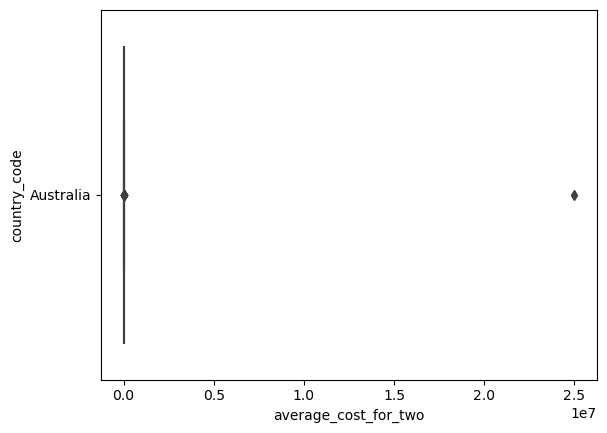

In [19]:
sns.boxplot(data=df1[df1['country_code'] == 'Australia'], x='average_cost_for_two', y='country_code', orient='h')
      

In [20]:
df1[df1['country_code'] == 'Australia']['average_cost_for_two'].idxmax()

356

In [21]:
df1 = df1.drop(356)

<Axes: xlabel='average_cost_for_two', ylabel='country_code'>

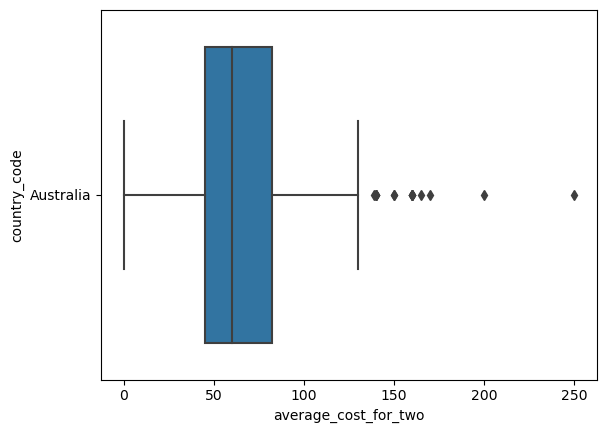

In [22]:
sns.boxplot(data=df1[df1['country_code'] == 'Australia'], x='average_cost_for_two', y='country_code', orient='h')
      

<Axes: xlabel='average_cost_for_two', ylabel='country_code'>

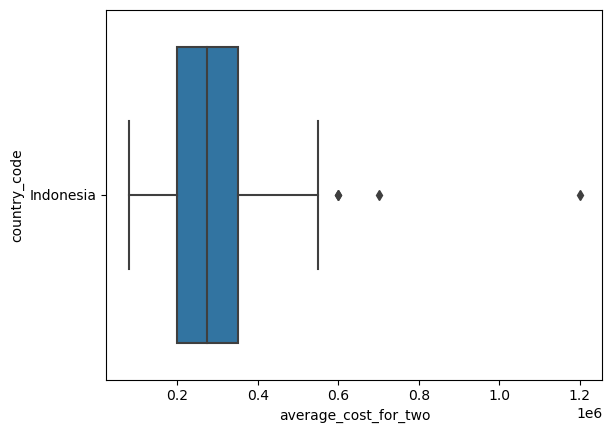

In [23]:
sns.boxplot(data=df1[df1['country_code'] == 'Indonesia'], x='average_cost_for_two', y='country_code', orient='h')


In [24]:
df1[df1['country_code'] == 'Indonesia']['average_cost_for_two'].idxmax()

5580

In [25]:
df1 = df1.drop([5580,5581])

<Axes: xlabel='average_cost_for_two', ylabel='country_code'>

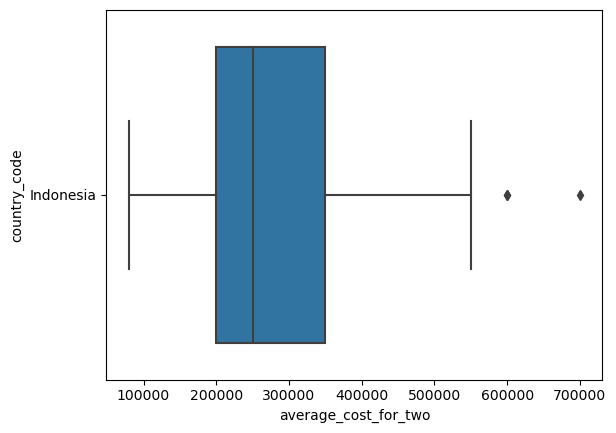

In [26]:
sns.boxplot(data=df1[df1['country_code'] == 'Indonesia'], x='average_cost_for_two', y='country_code', orient='h')


# Exportanto o arquivo tratado

In [27]:
df1.to_csv('zomato_tratado.csv', sep=',', index=False)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 6941
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   restaurant_id            6926 non-null   int64  
 1   restaurant_name          6926 non-null   object 
 2   country_code             6926 non-null   object 
 3   city                     6926 non-null   object 
 4   address                  6926 non-null   object 
 5   locality                 6926 non-null   object 
 6   locality_verbose         6926 non-null   object 
 7   longitude                6926 non-null   float64
 8   latitude                 6926 non-null   float64
 9   cuisines                 6926 non-null   object 
 10  average_cost_for_two     6926 non-null   int64  
 11  currency                 6926 non-null   object 
 12  has_table_booking        6926 non-null   int64  
 13  has_online_delivery      6926 non-null   int64  
 14  is_delivering_now       